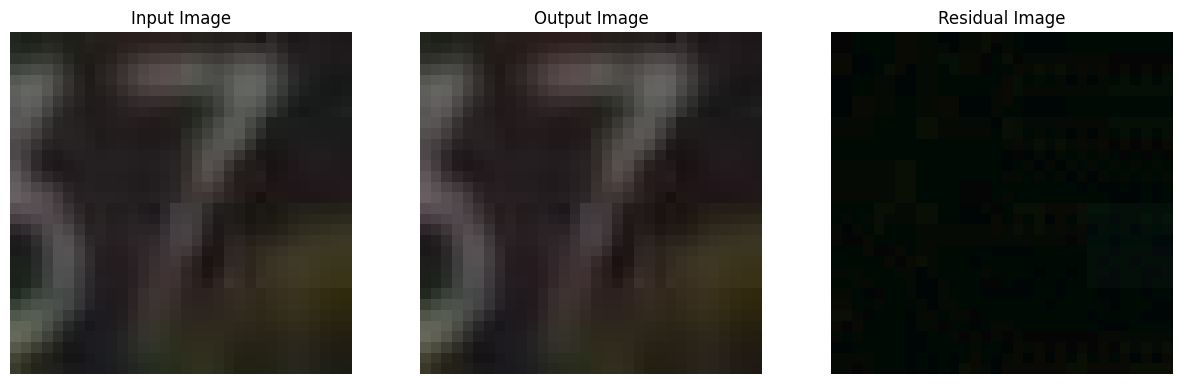

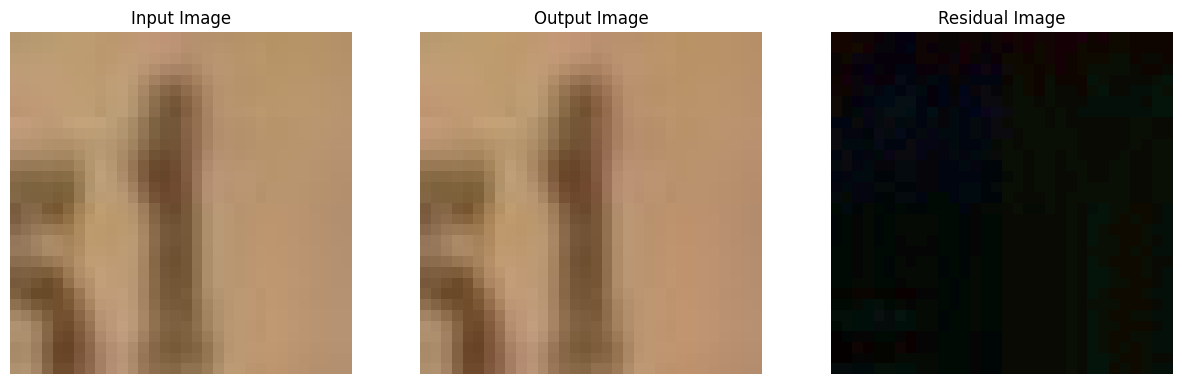

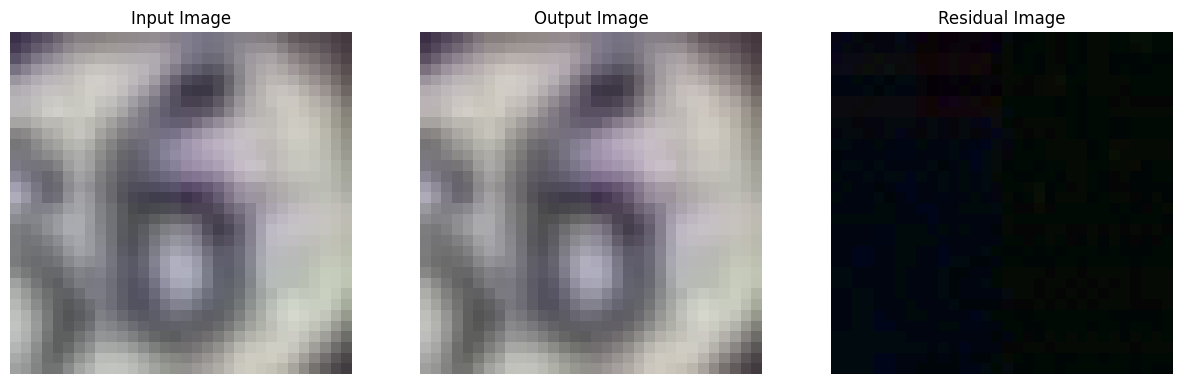

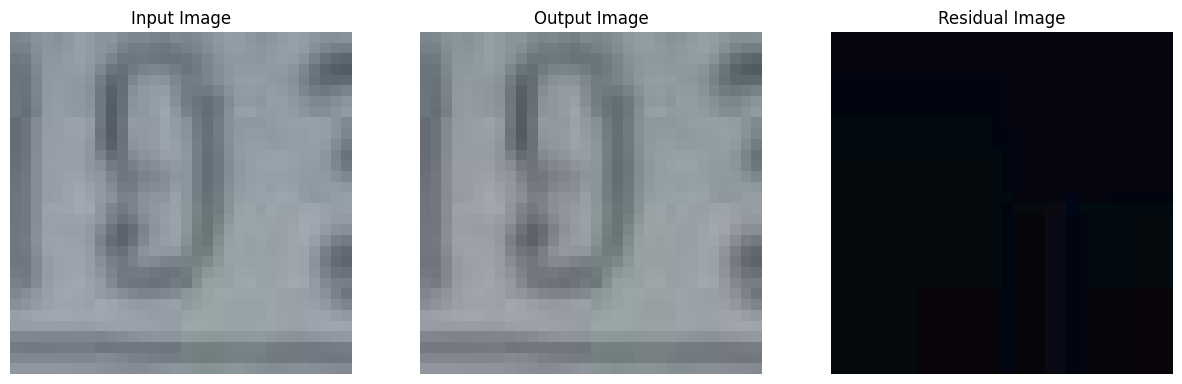

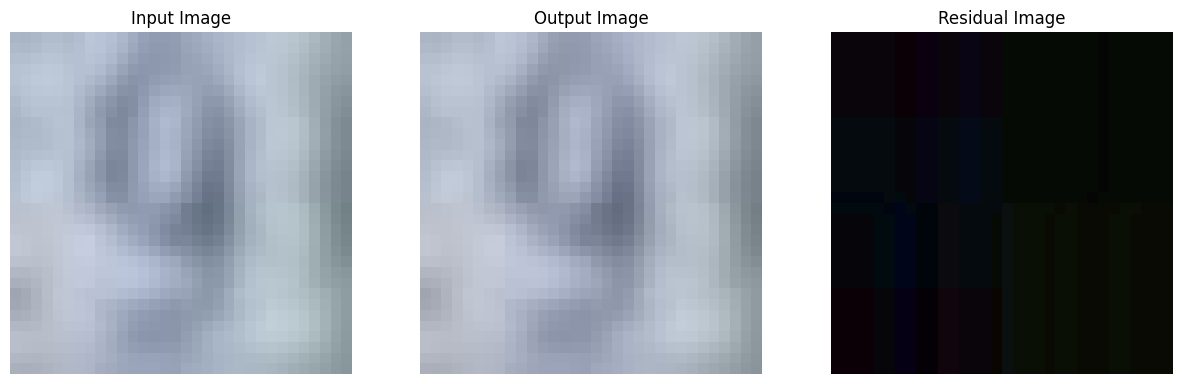

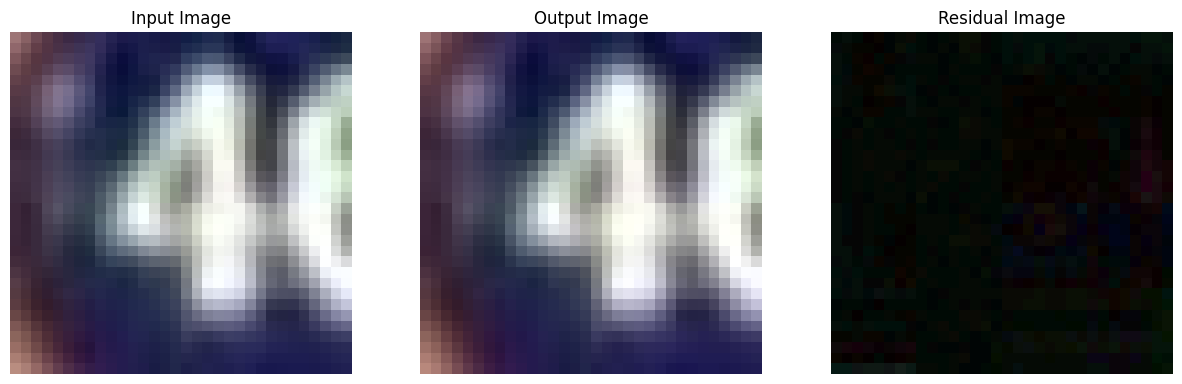

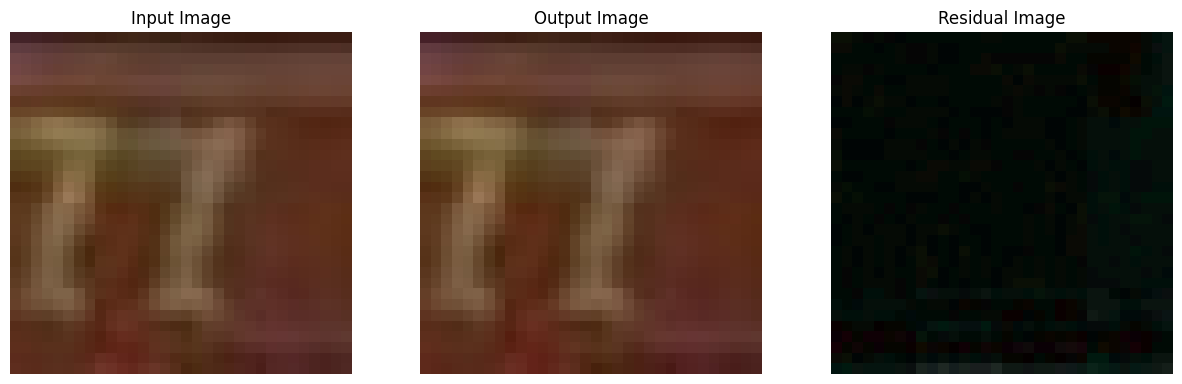

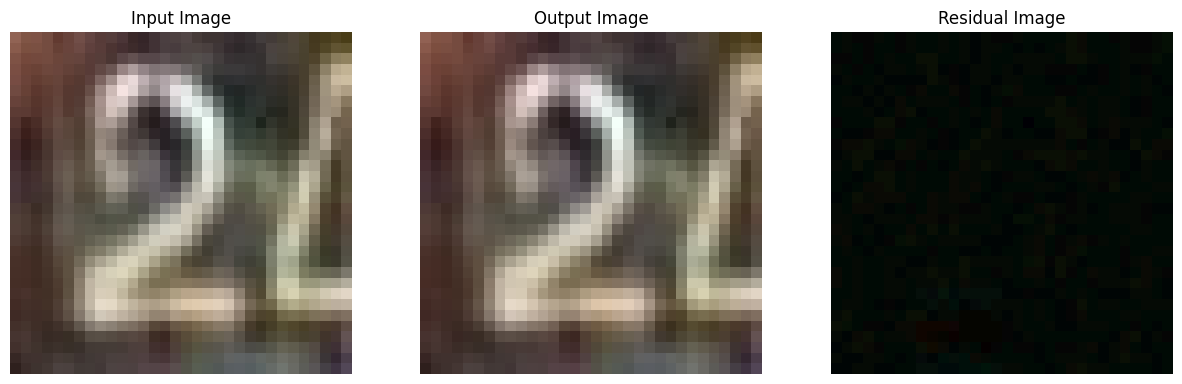

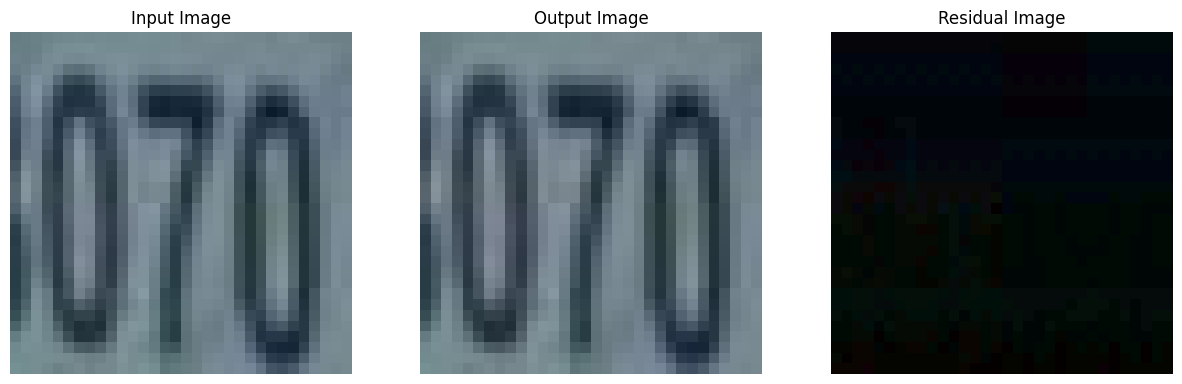

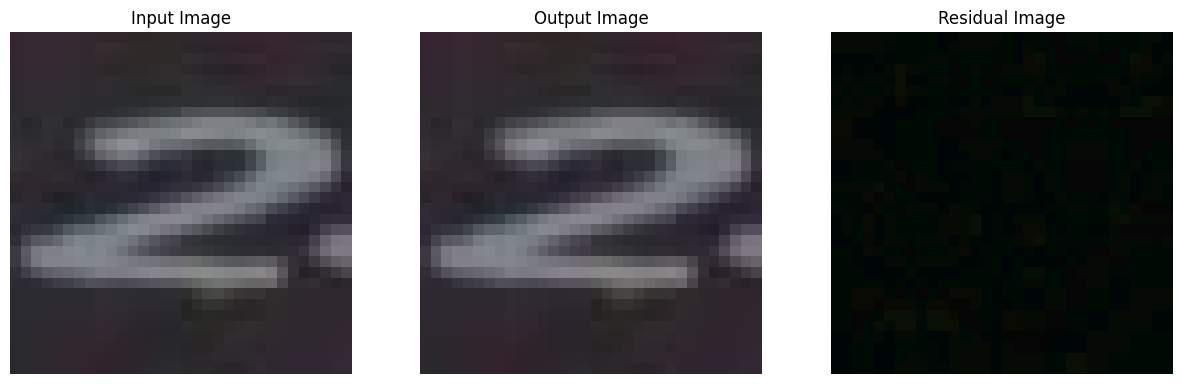

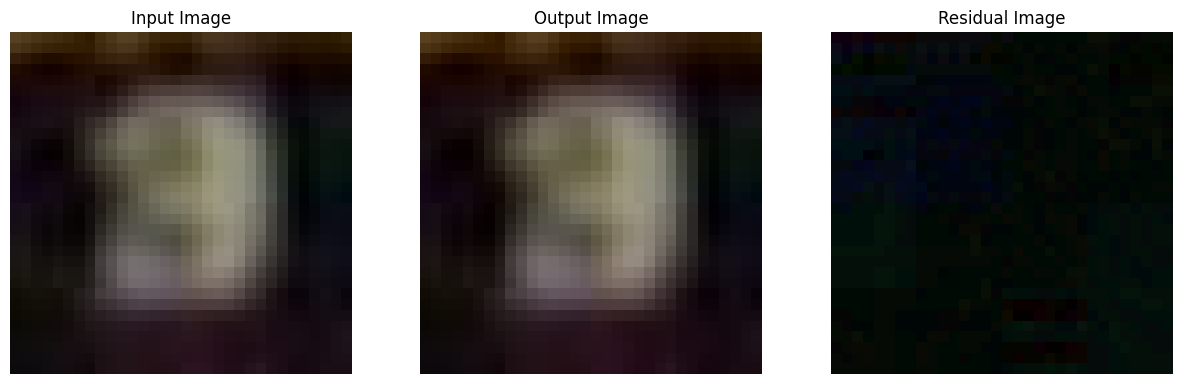

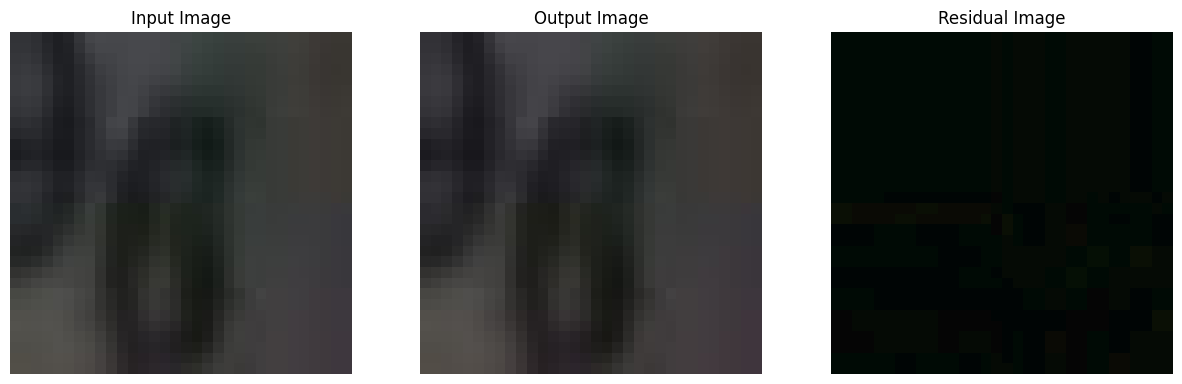

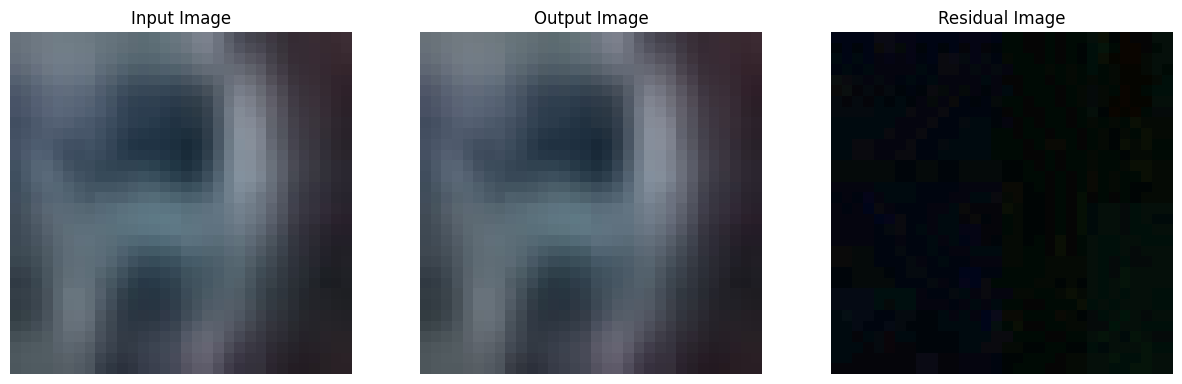

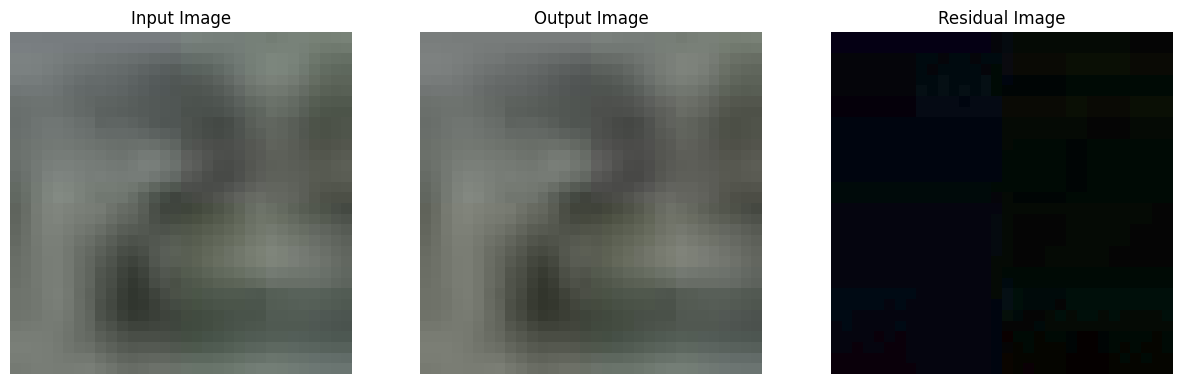

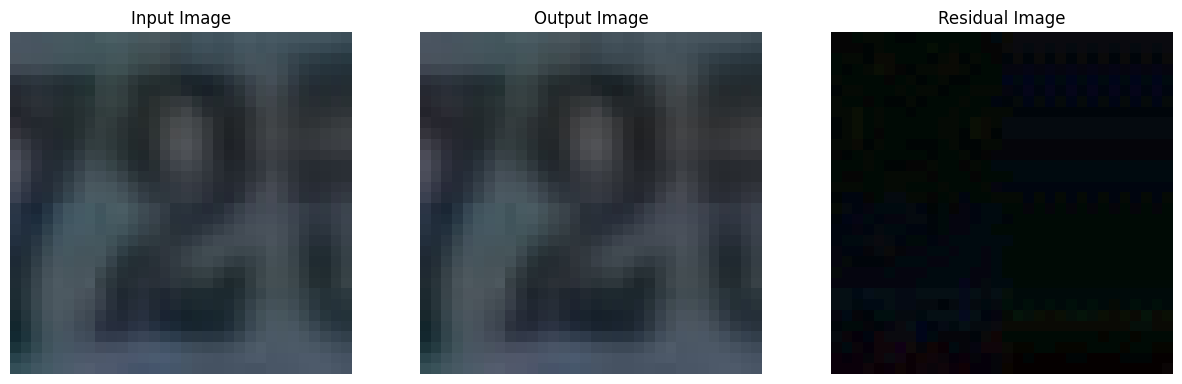

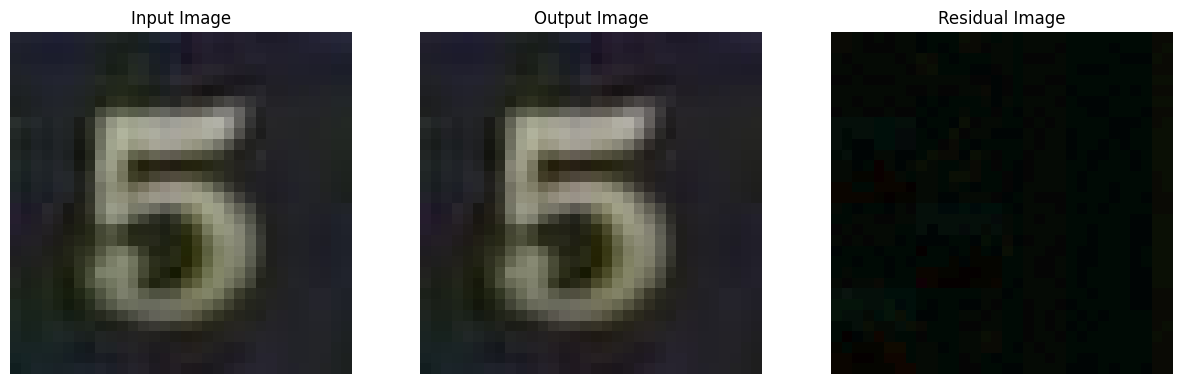

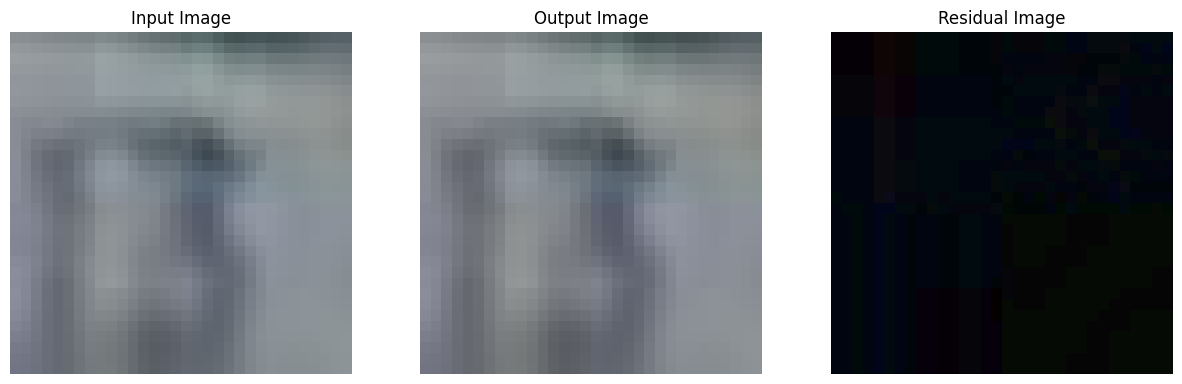

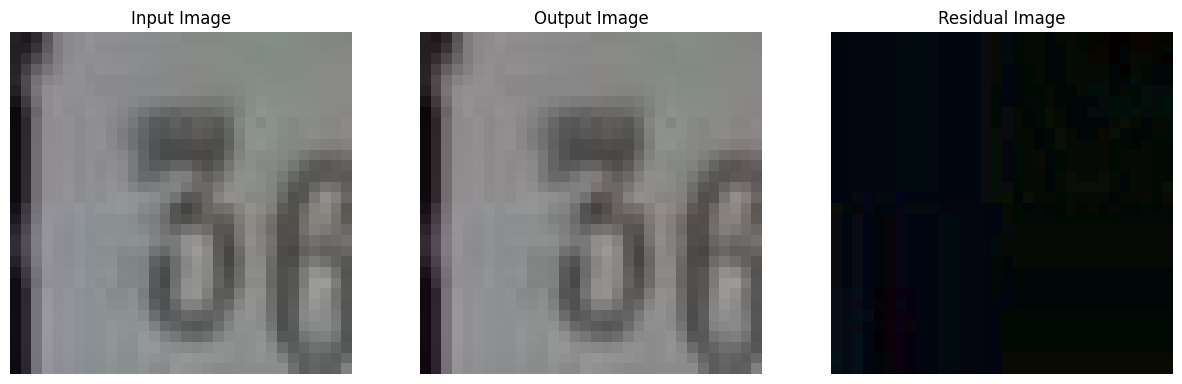

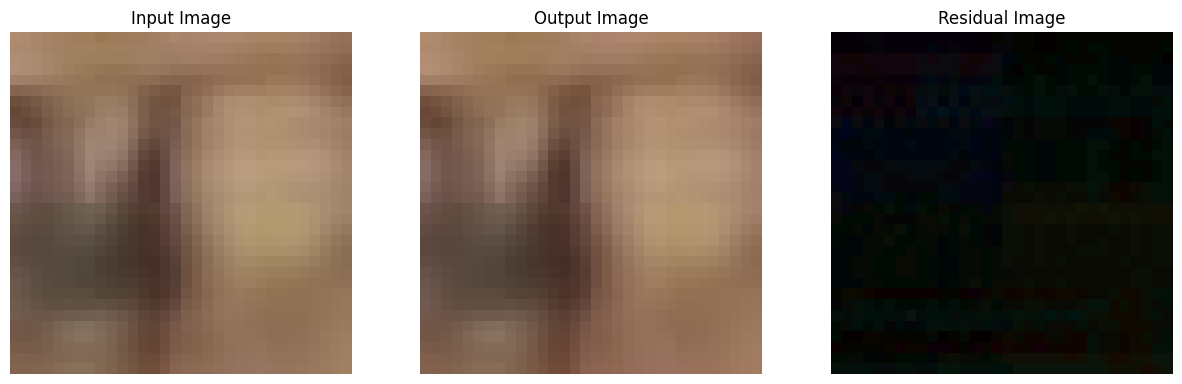

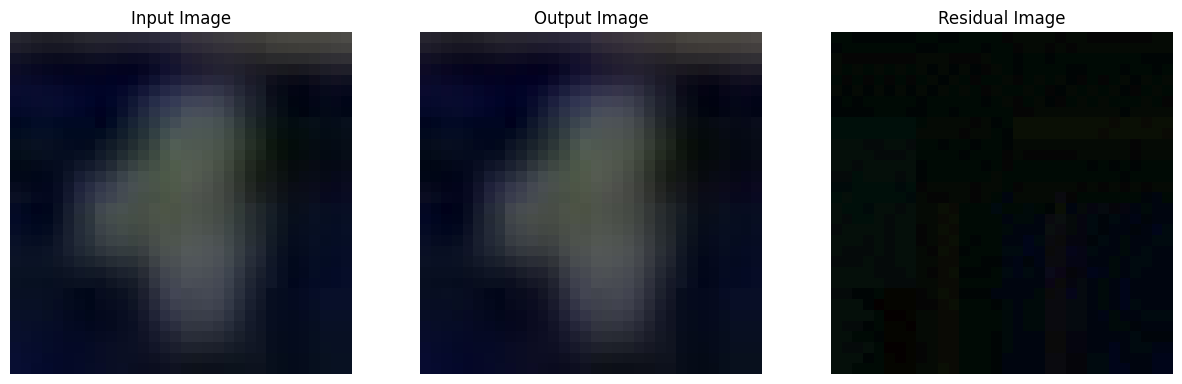

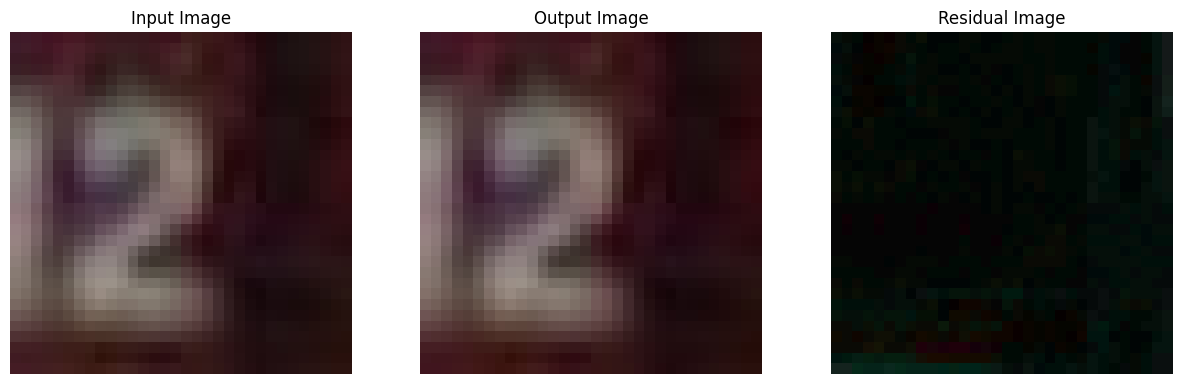

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def calculate_and_display_residual(input_folder, output_folder):
    """
    计算并展示输入和输出文件夹中具有相同文件名的图片的放大彩色残差。
    :param input_folder: 输入文件夹路径
    :param output_folder: 输出文件夹路径
    """
    input_files = os.listdir(input_folder)

    for file_name in input_files:
        input_file_path = os.path.join(input_folder, file_name)
        output_file_path = os.path.join(output_folder, file_name)

        if os.path.exists(output_file_path):
            # 读取图像
            input_image = Image.open(input_file_path)
            output_image = Image.open(output_file_path)

            # 确保图片是相同尺寸
            if input_image.size != output_image.size:
                print(f"Image sizes do not match for {file_name}. Skipping.")
                continue

            # 计算残差
            input_array = np.array(input_image, dtype=int)  # 使用整型防止溢出
            output_array = np.array(output_image, dtype=int)  # 使用整型防止溢出
            residual_array = np.abs(input_array - output_array)

            # 放大残差
            residual_array = residual_array * 5  # 假设放大5倍

            # 归一化到0-255范围
            residual_array = np.clip(residual_array, 0, 255).astype(np.uint8)

            # 创建残差图像
            residual_image = Image.fromarray(residual_array)

            # 使用matplotlib显示图像
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            axs[0].imshow(input_image)
            axs[0].set_title('Input Image')
            axs[0].axis('off')

            axs[1].imshow(output_image)
            axs[1].set_title('Output Image')
            axs[1].axis('off')

            axs[2].imshow(residual_image)
            axs[2].set_title('Residual Image')
            axs[2].axis('off')

            plt.show()


# 使用方法
calculate_and_display_residual('data/svhn/2023-12-21-00:04:42', 'data/svhn/test')


In [1]:
import pickle

with open('./output/cifar10/gtsrb_backdoored_encoder/2023-12-20-16:03:49/feature_banks.pkl', 'rb') as f:
    feature_banks = pickle.load(f)


print(feature_banks.keys())
args=feature_banks['args']
train=feature_banks['training']
test=feature_banks['testing']
backdoor=feature_banks['backdoor']
target=feature_banks['target']

print('args',feature_banks['args'])
print('train',feature_banks['training'].shape)
print('test',feature_banks['testing'].shape)
print('backdoor',feature_banks['backdoor'].shape)
print('target',feature_banks['target'].shape)


dict_keys(['args', 'training', 'testing', 'backdoor', 'target'])
args Namespace(batch_size=512, color=0.3, data_dir='./data/cifar10/', encoder_usage_info='cifar10', epochs=200, gpu='5', hue_hsv=1, knn_k=200, knn_t=0.5, lambda1=1.0, lambda2=1.0, lightness=1, loss0=5.0, lr=0.001, pretrained_encoder='./output/cifar10/clean_encoder/model_1000.pth', pretraining_dataset='cifar10', psnr=0.025, rand_init=False, reference_file='./reference/cifar10/priority.npz', reference_label=0, results_dir='./output/cifar10/gtsrb_backdoored_encoder/2023-12-20-16:03:49/', saturation_hsv=1, seed=100, shadow_dataset='cifar10', timestamp='2023-12-20-16:03:49', trigger_file='optimize_filter/trigger/cifar10/2023-12-06-23-41-20/ssim0.9328_psnr22.50_lp0.0291_wd0.603_color11.353.pt', value_hsv=1)
train (39209, 512)
test (12630, 512)
backdoor (12630, 512)
target (1, 512)


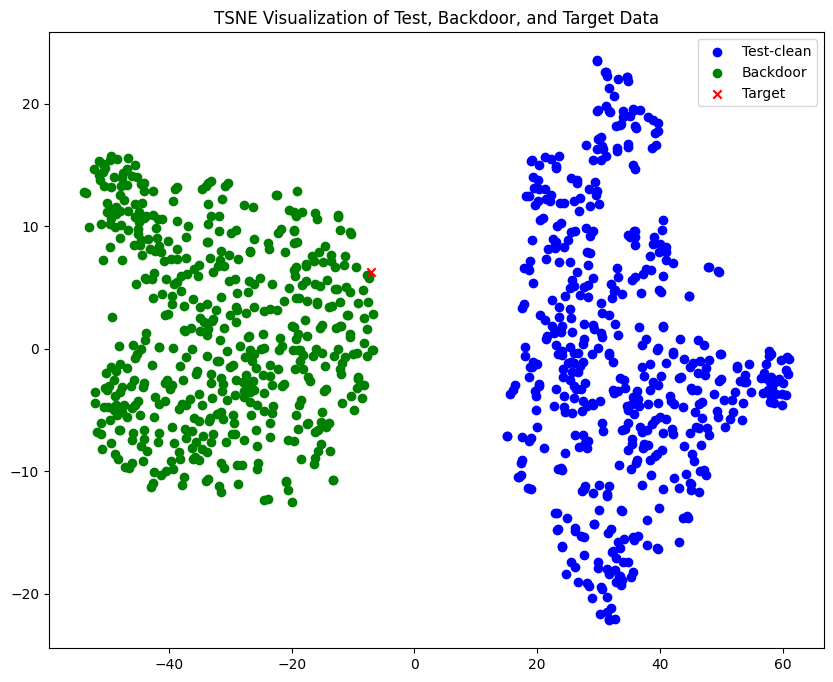

In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming test, backdoor, and target are numpy arrays of the shapes mentioned
# For demonstration, I will create dummy data with the same shapes
np.random.seed(0)  # For reproducibility of random data
# Concatenating all arrays for TSNE
num=500
data = np.concatenate((test[:num], backdoor[:num], target))

# Applying TSNE
tsne = TSNE(n_components=2, random_state=0)
transformed_data = tsne.fit_transform(data)

# Splitting the transformed data
transformed_test = transformed_data[:num]
transformed_backdoor = transformed_data[num:num*2]
transformed_target = transformed_data[-1]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(transformed_test[:, 0], transformed_test[:, 1], c='blue', label='Test-clean')
plt.scatter(transformed_backdoor[:, 0], transformed_backdoor[:, 1], c='green', label='Backdoor')
plt.scatter(transformed_target[0], transformed_target[1], c='red', label='Target', marker='x')
plt.title("TSNE Visualization of Test, Backdoor, and Target Data")
plt.legend()
plt.show()


dict_keys(['args', 'training', 'testing', 'backdoor', 'target'])
args Namespace(batch_size=512, color=0.0, data_dir='./data/cifar10/', encoder_usage_info='cifar10', epochs=200, gpu='5', hue_hsv=1, knn_k=200, knn_t=0.5, lambda1=1.0, lambda2=1.0, lightness=1, loss0=10.0, lr=0.001, pretrained_encoder='./output/cifar10/clean_encoder/model_1000.pth', pretraining_dataset='cifar10', psnr=0.025, rand_init=False, reference_file='./reference/cifar10/truck.npz', reference_label=0, results_dir='./output/cifar10/stl10_backdoored_encoder/2023-12-25-20:38:59/', saturation_hsv=1, seed=100, shadow_dataset='cifar10', timestamp='2023-12-25-20:38:59', trigger_file='optimize_filter/trigger/cifar10/2023-12-20-23-18-29/ssim0.9855_psnr30.10_lp0.0166_wd0.066_color3.966.pt', value_hsv=1)
train (5000, 512)
test (8000, 512)
backdoor (8000, 512)
target (1, 512)


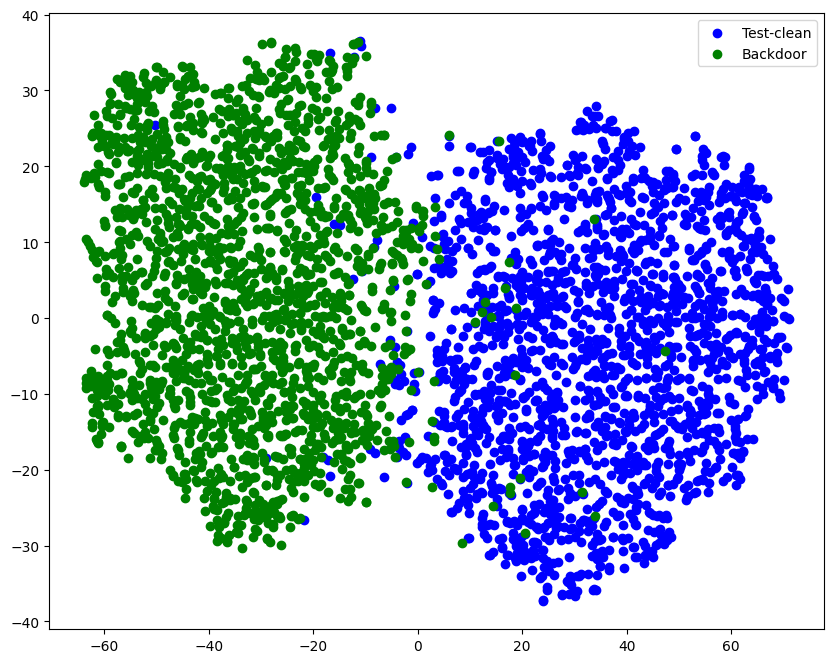

In [23]:
import pickle

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def main(feature_path):
    with open(feature_path, 'rb') as f:
        feature_banks = pickle.load(f)

    print(feature_banks.keys())
    args=feature_banks['args']
    train=feature_banks['training']
    test=feature_banks['testing']
    backdoor=feature_banks['backdoor']
    target=feature_banks['target']

    print('args',feature_banks['args'])
    print('train',feature_banks['training'].shape)
    print('test',feature_banks['testing'].shape)
    print('backdoor',feature_banks['backdoor'].shape)
    print('target',feature_banks['target'].shape)

    # Assuming test, backdoor, and target are numpy arrays of the shapes mentioned
    # For demonstration, I will create dummy data with the same shapes
    np.random.seed(0)  # For reproducibility of random data
    # Concatenating all arrays for TSNE
    num=2000
    data = np.concatenate((test[:num], backdoor[:num], target))

    # Applying TSNE
    tsne = TSNE(n_components=2, random_state=0)
    transformed_data = tsne.fit_transform(data)

    # Splitting the transformed data
    transformed_test = transformed_data[:num]
    transformed_backdoor = transformed_data[num:num*2]
    transformed_target = transformed_data[-1]

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.scatter(transformed_test[:, 0], transformed_test[:, 1], c='blue', label='Test-clean')
    plt.scatter(transformed_backdoor[:, 0], transformed_backdoor[:, 1], c='green', label='Backdoor')
    # plt.scatter(transformed_target[0], transformed_target[1], c='red', label='Target', marker='x')
    # plt.title("TSNE Visualization of Test, Backdoor, and Target Data")
    plt.legend()
    # plt.show()
    path = feature_path.split('/')[-2]
    plt.savefig(f'TSNE/{path}.png')
    # plt.close()

if __name__ == '__main__':
    # main('../output/stl10/cifar10_backdoored_encoder/2023-12-16-17:34:27bpp/feature_banks.pkl')
    # main('../output/cifar10/stl10_backdoored_encoder/2023-12-16-17:28:47bpp/feature_banks.pkl')


    #### ins trigger
    # main('../output/stl10/cifar10_backdoored_encoder/2023-12-29-21:21:21/feature_banks.pkl')
    # main('../output/stl10/gtsrb_backdoored_encoder/2023-12-29-21:21:16/feature_banks.pkl')


    #### patch trigger
    # main('../output/stl10/cifar10_backdoored_encoder/feature_banks.pkl')
    # main('../output/stl10/gtsrb_backdoored_encoder/feature_banks.pkl')
    # main('../output/stl10/svhn_backdoored_encoder/feature_banks.pkl')
    # main('../output/cifar10/stl10_backdoored_encoder/feature_banks.pkl')
    # main('../output/cifar10/gtsrb_backdoored_encoder/feature_banks.pkl')
    main('../output/cifar10/stl10_backdoored_encoder/2023-12-25-20:38:59/feature_banks.pkl')

    # main('../output/cifar10/gtsrb_backdoored_encoder/2023-12-20-16:03:49/feature_banks.pkl')

dict_keys(['args', 'training', 'testing', 'backdoor', 'target'])
args Namespace(batch_size=512, color=0.1, data_dir='./data/cifar10/', encoder_usage_info='cifar10', epochs=200, gpu='4', hue_hsv=1, knn_k=200, knn_t=0.5, lambda1=1.0, lambda2=1.0, lightness=1, loss0=10.0, lr=0.001, pretrained_encoder='./output/cifar10/clean_encoder/model_1000.pth', pretraining_dataset='cifar10', psnr=0.025, rand_init=False, reference_file='./reference/cifar10/truck.npz', reference_label=0, results_dir='./output/cifar10/stl10_backdoored_encoder/2023-12-25-20:38:31/', saturation_hsv=1, seed=100, shadow_dataset='cifar10', timestamp='2023-12-25-20:38:31', trigger_file='optimize_filter/trigger/cifar10/2023-12-06-23-41-20/ssim0.9328_psnr22.50_lp0.0291_wd0.603_color11.353.pt', value_hsv=1)
train (5000, 512)
test (8000, 512)
backdoor (8000, 512)
target (1, 512)


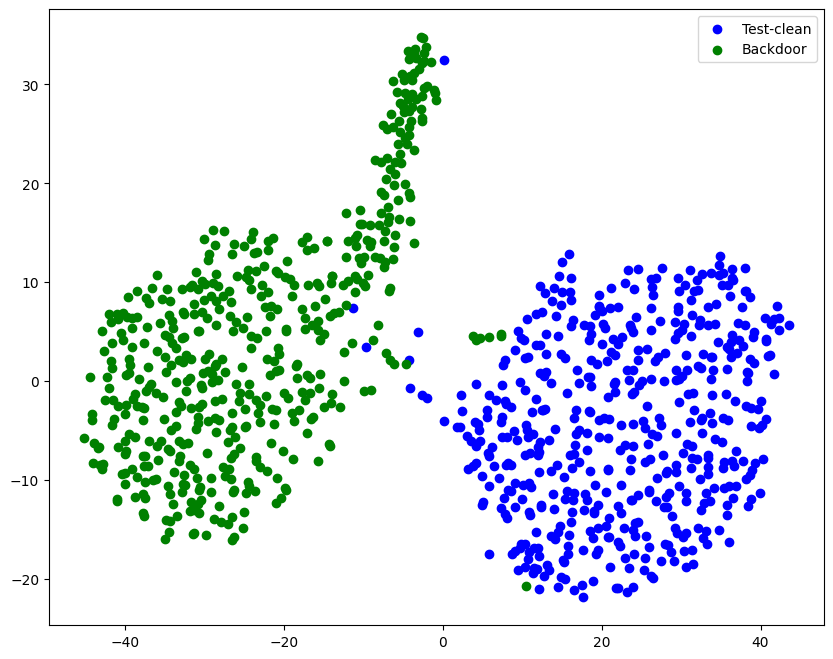

In [18]:
main('../output/cifar10/stl10_backdoored_encoder/2023-12-25-20:38:31/feature_banks.pkl')

dict_keys(['args', 'training', 'testing', 'backdoor', 'target'])
args Namespace(batch_size=128, color=0.1, data_dir='./data/cifar10/', encoder_usage_info='cifar10', epochs=200, gpu='1', hue_hsv=1, knn_k=200, knn_t=0.5, lambda1=1.0, lambda2=1.0, lightness=1, loss0=10.0, lr=0.001, pretrained_encoder='./output/cifar10/clean_encoder/model_1000.pth', pretraining_dataset='cifar10', psnr=0.025, rand_init=True, reference_file='./reference/cifar10/priority.npz', reference_label=0, results_dir='./output/cifar10/gtsrb_backdoored_encoder/2024-01-03-12:21:01/', saturation_hsv=1, seed=100, shadow_dataset='cifar10', timestamp='2024-01-03-12:21:01', trigger_file='optimize_filter/trigger/cifar10/2023-12-06-23-41-20/ssim0.9328_psnr22.50_lp0.0291_wd0.603_color11.353.pt', value_hsv=1)
train (39209, 512)
test (12630, 512)
backdoor (12630, 512)
target (1, 512)


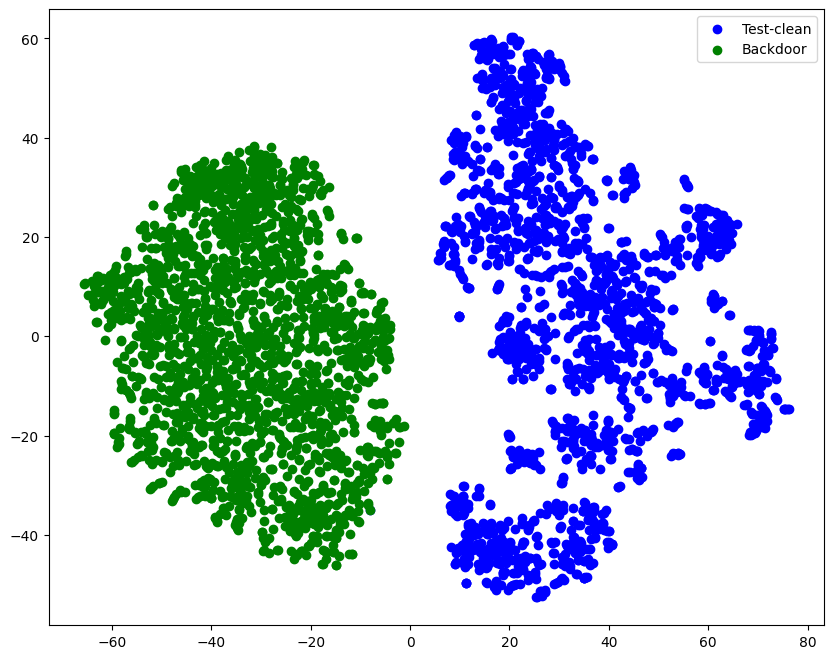

In [25]:
main('../output/cifar10/gtsrb_backdoored_encoder/2024-01-03-12:21:01/feature_banks.pkl')

dict_keys(['args', 'training', 'testing', 'backdoor', 'target'])
args Namespace(batch_size=512, color=0.0, data_dir='./data/cifar10/', encoder_usage_info='cifar10', epochs=200, gpu='0', hue_hsv=1, knn_k=200, knn_t=0.5, lambda1=1.0, lambda2=1.0, lightness=1, loss0=10.0, lr=0.001, pretrained_encoder='./output/cifar10/clean_encoder/model_1000.pth', pretraining_dataset='cifar10', psnr=0.025, rand_init=True, reference_file='./reference/cifar10/priority.npz', reference_label=0, results_dir='./output/cifar10/gtsrb_backdoored_encoder/2024-01-03-12:20:49/', saturation_hsv=1, seed=100, shadow_dataset='cifar10', timestamp='2024-01-03-12:20:49', trigger_file='optimize_filter/trigger/cifar10/2023-12-20-23-18-29/ssim0.9855_psnr30.10_lp0.0166_wd0.066_color3.966.pt', value_hsv=1)
train (39209, 512)
test (12630, 512)
backdoor (12630, 512)
target (1, 512)


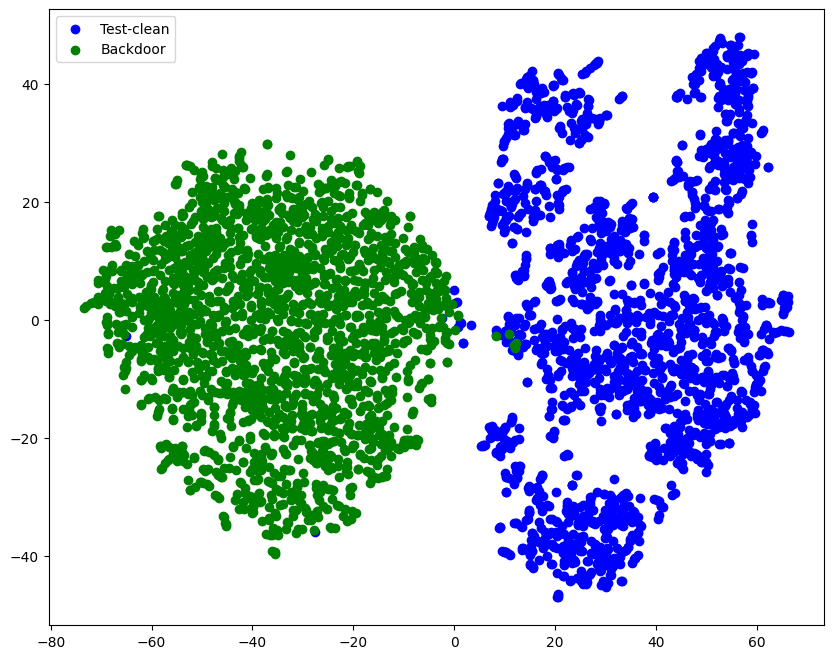

In [24]:
main('../output/cifar10/gtsrb_backdoored_encoder/2024-01-03-12:20:49/feature_banks.pkl')

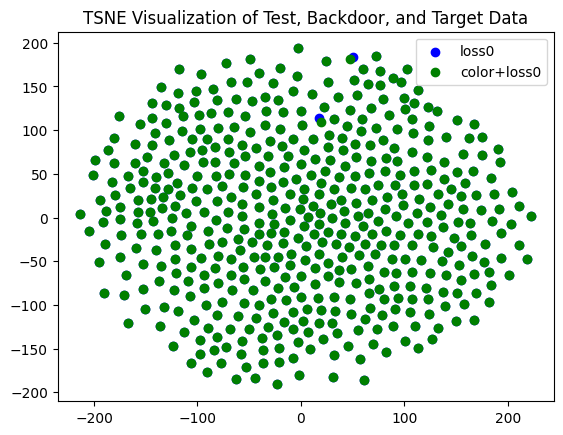

In [14]:
import pickle

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def main(f1,f2):
    with open(f1, 'rb') as f:
        feature_banks1 = pickle.load(f)
    with open(f1, 'rb') as f:
        feature_banks2 = pickle.load(f)

    backdoor1=feature_banks1['backdoor']
    backdoor2=feature_banks2['backdoor']


    # Assuming test, backdoor, and target are numpy arrays of the shapes mentioned
    # For demonstration, I will create dummy data with the same shapes
    np.random.seed(0)  # For reproducibility of random data
    # Concatenating all arrays for TSNE
    num=500
    data = np.concatenate((backdoor1[:num], backdoor2[:num]))

    # Applying TSNE
    tsne = TSNE(n_components=2, random_state=0)
    transformed_data = tsne.fit_transform(data)

    # Splitting the transformed data
    backdoor1 = transformed_data[:num]
    backdoor2 = transformed_data[num:num*2]

    # Plotting
    plt.figure()
    plt.scatter(backdoor1[:, 0], backdoor1[:, 1], c='blue', label='loss0')
    plt.scatter(backdoor2[:, 0], backdoor2[:, 1], c='green', label='color+loss0')
    # plt.scatter(transformed_target[0], transformed_target[1], c='red', label='Target', marker='x')
    plt.title("TSNE Visualization of Test, Backdoor, and Target Data")
    plt.legend()
    # plt.show()
    path = 'add_salt_and_pepper_noise'
    plt.savefig(f'TSNE/{path}.png')
    # plt.close()

if __name__ == '__main__':
    f1='../output/cifar10/stl10_backdoored_encoder/2023-12-25-20:38:59/feature_banks.pkl'
    f2='../output/cifar10/stl10_backdoored_encoder/2023-12-25-20:38:31/feature_banks.pkl'
    main(f1,f2)

dict_keys(['patch', 'ins', 'filter'])
ins torch.Size([10000, 512])
patch torch.Size([10000, 512])
filter torch.Size([10000, 512])


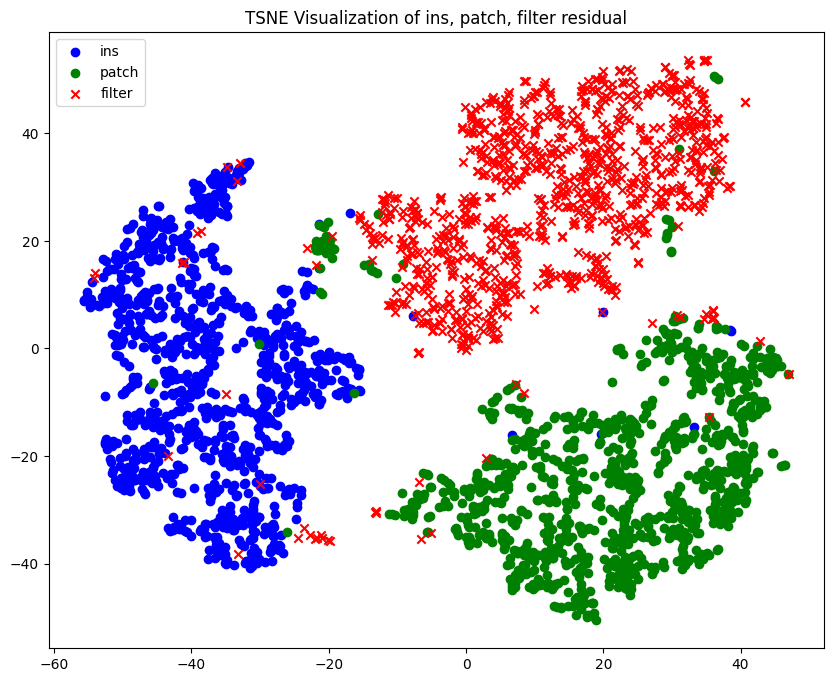

In [4]:
import pickle

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

with open('feature_bank/features_residual.pkl', 'rb') as f:
    feature_banks = pickle.load(f)

print(feature_banks.keys())
ins=feature_banks['ins'].cpu()
patch=feature_banks['patch'].cpu()
filter_img=feature_banks['filter'].cpu()

print('ins',feature_banks['ins'].shape)
print('patch',feature_banks['patch'].shape)
print('filter',feature_banks['filter'].shape)

# Assuming test, backdoor, and target are numpy arrays of the shapes mentioned
# For demonstration, I will create dummy data with the same shapes
np.random.seed(0)  # For reproducibility of random data
# Concatenating all arrays for TSNE
num=1000
data = np.concatenate((ins[:num], patch[:num], filter_img[:num]))

# Applying TSNE
tsne = TSNE(n_components=2, random_state=0)
transformed_data = tsne.fit_transform(data)

# Splitting the transformed data
transformed_ins = transformed_data[:num]
transformed_patch = transformed_data[num:num*2]
transformed_filter = transformed_data[num*2:num*3]


# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(transformed_ins[:, 0], transformed_ins[:, 1], c='blue', label='ins')
plt.scatter(transformed_patch[:, 0], transformed_patch[:, 1], c='green', label='patch')
plt.scatter(transformed_filter[:, 0], transformed_filter[:, 1], c='red', label='filter', marker='x')
# plt.scatter(transformed_target[0], transformed_target[1], c='red', label='Target', marker='x')
plt.title("TSNE Visualization of ins, patch, filter residual")
plt.legend()
plt.show()
plt.savefig(f'TSNE/feature_ins_patch_filter_residual.png')
plt.close()



dict_keys(['ins', 'filter', 'ins_aug', 'filter_aug'])


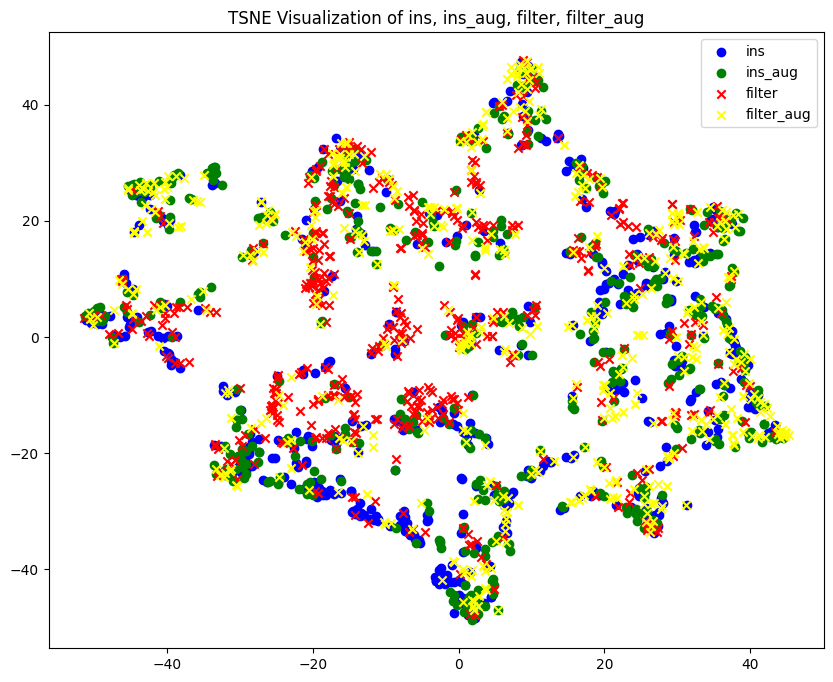

In [14]:
import pickle

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

with open('feature_bank/features_residual_aug.pkl', 'rb') as f:
    feature_banks = pickle.load(f)

print(feature_banks.keys())
ins=feature_banks['ins'].cpu()
ins_aug=feature_banks['ins_aug'].cpu()
# patch=feature_banks['patch'].cpu()
filter_img=feature_banks['filter'].cpu()
filter_aug=feature_banks['filter_aug'].cpu()


# Assuming test, backdoor, and target are numpy arrays of the shapes mentioned
# For demonstration, I will create dummy data with the same shapes
np.random.seed(0)  # For reproducibility of random data
# Concatenating all arrays for TSNE
num=500
data = np.concatenate((ins[:num], ins_aug[:num], filter_img[:num], filter_aug[:num]))

# Applying TSNE
tsne = TSNE(n_components=2, random_state=0)
transformed_data = tsne.fit_transform(data)

# Splitting the transformed data
transformed_ins = transformed_data[:num]
transformed_ins_aug = transformed_data[num:num*2]
transformed_filter = transformed_data[num*2:num*3]
transformed_filter_aug = transformed_data[num*3:num*4]


# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(transformed_ins[:, 0], transformed_ins[:, 1], c='blue', label='ins')
plt.scatter(transformed_ins_aug[:, 0], transformed_ins_aug[:, 1], c='green', label='ins_aug')
plt.scatter(transformed_filter[:, 0], transformed_filter[:, 1], c='red', label='filter', marker='x')
plt.scatter(transformed_filter_aug[:, 0], transformed_filter_aug[:, 1], c='yellow', label='filter_aug', marker='x')
# plt.scatter(transformed_target[0], transformed_target[1], c='red', label='Target', marker='x')
plt.title("TSNE Visualization of ins, ins_aug, filter, filter_aug")
plt.legend()
plt.show()
plt.savefig(f'TSNE/feature_ins_filter_aug1.png')
plt.close()



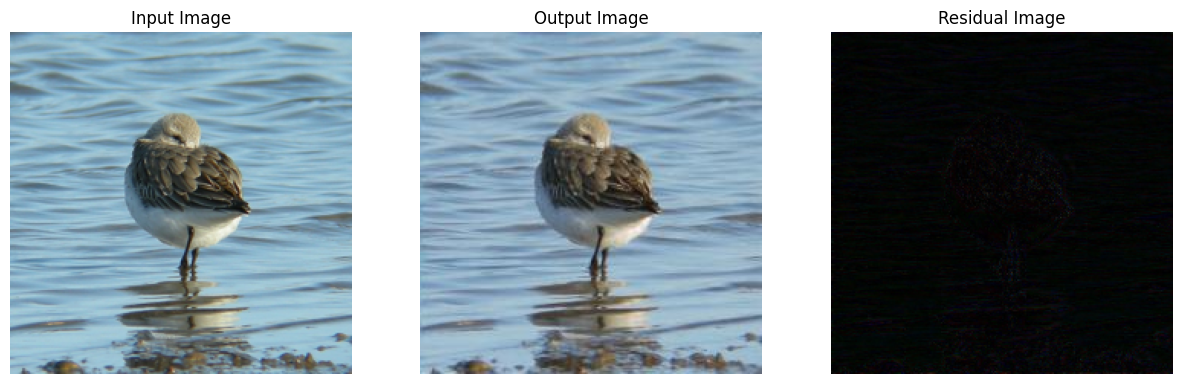

In [5]:
bd='../data/imagenet/ssim0.9681_psnr31.89_lp0.0124_wd0.203_color5.491-even/n02027492_9711.JPEG'
issba='../data/imagenet/train_issba/n02027492/n02027492_9711.JPEG'
origin='../data/imagenet/train/n02027492/n02027492_9711.JPEG'

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def calculate_and_display_residual(origin, alter):


    origin = Image.open(origin)
    origin = origin.resize((224, 224))
    alter = Image.open(alter)


    # 计算残差
    input_array = np.array(origin, dtype=int)  # 使用整型防止溢出
    output_array = np.array(alter, dtype=int)  # 使用整型防止溢出
    residual_array = np.abs(input_array - output_array)

    # 放大残差
    # residual_array = residual_array * 5  # 假设放大5倍

    # 归一化到0-255范围
    residual_array = np.clip(residual_array, 0, 255).astype(np.uint8)

    # 创建残差图像
    residual_image = Image.fromarray(residual_array)
    if not os.path.exists('imgs/issba'):
        os.makedirs('imgs/issba')
    origin.save('imgs/issba/origin.jpg')
    alter.save('imgs/issba/alter.jpg')
    residual_image.save('imgs/issba/residual.jpg')
    # 使用matplotlib显示图像
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(origin)
    axs[0].set_title('Input Image')
    axs[0].axis('off')

    axs[1].imshow(alter)
    axs[1].set_title('Output Image')
    axs[1].axis('off')

    axs[2].imshow(residual_image)
    axs[2].set_title('Residual Image')
    axs[2].axis('off')

    plt.show()


# 使用方法
calculate_and_display_residual(origin,bd)


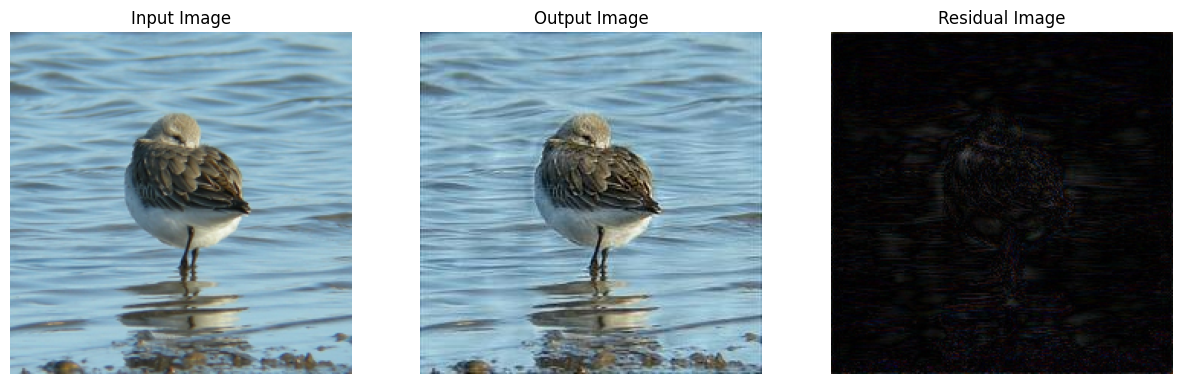

In [6]:
calculate_and_display_residual(origin,issba)


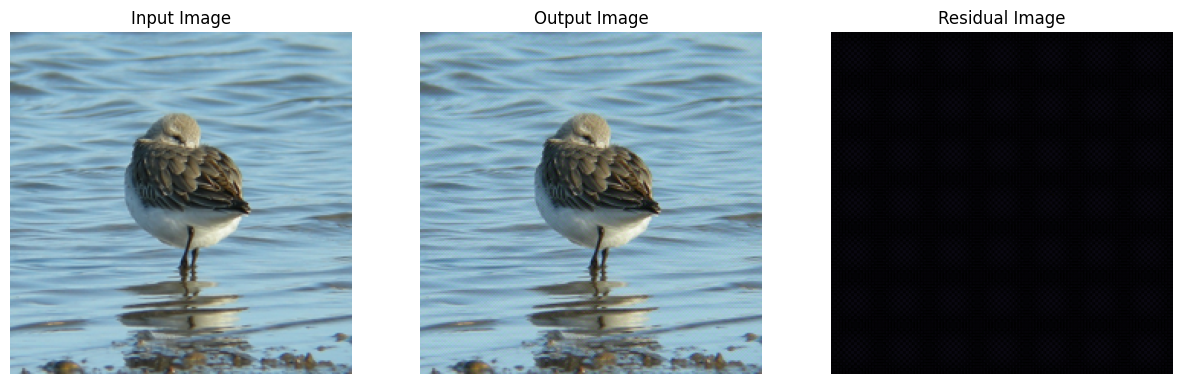

In [8]:
bd='../data/imagenet/ssim0.9681_psnr31.89_lp0.0124_wd0.203_color5.491-even/n02027492_9711.JPEG'
origin='../data/imagenet/train/n02027492/n02027492_9711.JPEG'

import sys
sys.path.append('../')
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import ToTensor
from datasets.CTRL.utils.frequency import PoisonFre
from copy import deepcopy

def calculate_and_display_residual(origin, alter):
        origin = Image.open(origin)
        origin = origin.resize((224, 224))

        image_pil = deepcopy(origin)
        tensor_image = transforms.ToTensor()(image_pil)

        base_image=tensor_image.unsqueeze(0)
        poison_frequency_agent = PoisonFre('args',32, [1,2], 32, [15,31],  False,  True)

        x_tensor,_ = poison_frequency_agent.Poison_Frequency_Diff(base_image,0, 100.0)
        img_backdoor = x_tensor.squeeze()

        img_backdoor = np.clip(img_backdoor, 0, 1) #限制颜色范围在0-1
        alter = img_backdoor*255

        alter = alter.permute(1, 2, 0).numpy().astype(np.uint8)
        # 计算残差
        input_array = np.array(origin, dtype=int)  # 使用整型防止溢出
        output_array = np.array(alter, dtype=np.uint8)  # 使用整型防止溢出
        alter = Image.fromarray(output_array)

        residual_array = np.abs(input_array - output_array)

        # 放大残差
        # residual_array = residual_array * 5  # 假设放大5倍

        # 归一化到0-255范围
        residual_array = np.clip(residual_array, 0, 255).astype(np.uint8)

        # 创建残差图像
        residual_image = Image.fromarray(residual_array)
        if not os.path.exists('imgs/ctrl'):
                os.makedirs('imgs/ctrl')
        origin.save('imgs/ctrl/origin.jpg')
        alter.save('imgs/ctrl/alter.jpg')

        residual_image.save('imgs/ctrl/residual.jpg')
        # 使用matplotlib显示图像
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(origin)
        axs[0].set_title('Input Image')
        axs[0].axis('off')

        axs[1].imshow(alter)
        axs[1].set_title('Output Image')
        axs[1].axis('off')

        axs[2].imshow(residual_image)
        axs[2].set_title('Residual Image')
        axs[2].axis('off')

        plt.show()


# 使用方法
calculate_and_display_residual(origin,bd)


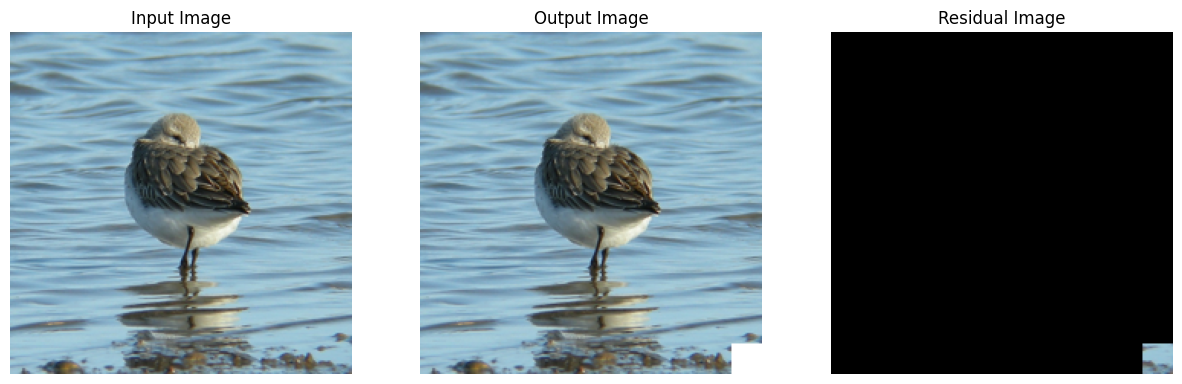

In [5]:
bd='../data/imagenet/ssim0.9681_psnr31.89_lp0.0124_wd0.203_color5.491-even/n02027492_9711.JPEG'
issba='../data/imagenet/train_issba/n02027492/n02027492_9711.JPEG'
origin='../data/imagenet/train/n02027492/n02027492_9711.JPEG'

import sys
sys.path.append('../')
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import ToTensor
from datasets.CTRL.utils.frequency import PoisonFre
from copy import deepcopy
from PIL import Image, ImageDraw

def calculate_and_display_residual(origin, alter):
        origin = Image.open(origin)
        origin = origin.resize((224, 224))

        alter = deepcopy(origin)

        trigger_size = 20  # Size of the square
        width, height = origin.size
        trigger_position = (width - trigger_size, height - trigger_size)  # Bottom right corner

        # Draw the trigger on the image
        draw = ImageDraw.Draw(alter)
        draw.rectangle([trigger_position, (width, height)], fill="white")

        # 计算残差
        input_array = np.array(origin, dtype=np.uint8)  # 使用整型防止溢出
        output_array = np.array(alter, dtype=np.uint8)  # 使用整型防止溢出
        alter = Image.fromarray(output_array)

        residual_array = np.abs(input_array - output_array)

        # 放大残差
        # residual_array = residual_array * 5  # 假设放大5倍

        # 归一化到0-255范围
        residual_array = np.clip(residual_array, 0, 255).astype(np.uint8)

        # 创建残差图像
        residual_image = Image.fromarray(residual_array)
        if not os.path.exists('imgs/badnets'):
                os.makedirs('imgs/badnets')
        origin.save('imgs/badnets/origin.jpg')
        alter.save('imgs/badnets/alter.jpg')

        residual_image.save('imgs/badnets/residual.jpg')
        # 使用matplotlib显示图像
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(origin)
        axs[0].set_title('Input Image')
        axs[0].axis('off')

        axs[1].imshow(alter)
        axs[1].set_title('Output Image')
        axs[1].axis('off')

        axs[2].imshow(residual_image)
        axs[2].set_title('Residual Image')
        axs[2].axis('off')

        plt.show()


# 使用方法
calculate_and_display_residual(origin,bd)


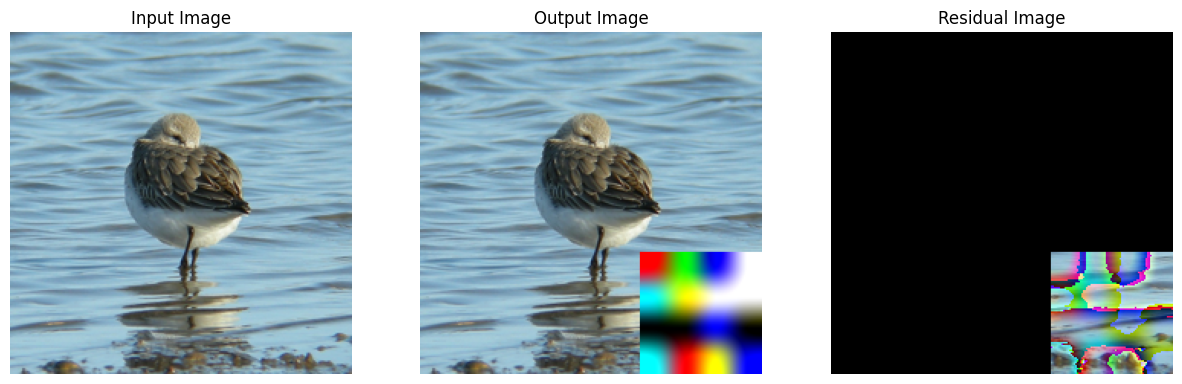

In [11]:
origin='../data/imagenet/train/n02027492/n02027492_9711.JPEG'
trigger_path = '../trigger/trigger_SSLBKD.png'

import sys
sys.path.append('../')
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import ToTensor
from datasets.CTRL.utils.frequency import PoisonFre
from copy import deepcopy
from PIL import Image, ImageDraw

def calculate_and_display_residual_with_trigger(origin, trigger_path):
    origin = Image.open(origin)
    origin = origin.resize((224, 224))

    alter = deepcopy(origin)

    trigger = Image.open(trigger_path).convert("RGBA")
    width, height = origin.size
    trigger_position = (width - trigger.width, height - trigger.height)  # 右下角

    # 将触发器位置的部分变成白色
    draw = ImageDraw.Draw(alter)
    draw.rectangle([trigger_position, (width, height)], fill=(255, 255, 255))

    # 将触发器粘贴到图像上
    alter.paste(trigger, trigger_position, trigger)

    # 计算残差
    input_array = np.array(origin, dtype=np.uint8)  # 使用整型防止溢出
    output_array = np.array(alter, dtype=np.uint8)  # 使用整型防止溢出
    alter = Image.fromarray(output_array)

    residual_array = np.abs(input_array - output_array)

    # 归一化到0-255范围
    residual_array = np.clip(residual_array, 0, 255).astype(np.uint8)

    # 创建残差图像
    residual_image = Image.fromarray(residual_array)
    if not os.path.exists('imgs/bkdssl'):
        os.makedirs('imgs/bkdssl')
    origin.save('imgs/bkdssl/origin.jpg')
    alter.save('imgs/bkdssl/alter.jpg')
    residual_image.save('imgs/bkdssl/residual.jpg')

    # 使用matplotlib显示图像
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(origin)
    axs[0].set_title('Input Image')
    axs[0].axis('off')

    axs[1].imshow(alter)
    axs[1].set_title('Output Image')
    axs[1].axis('off')

    axs[2].imshow(residual_image)
    axs[2].set_title('Residual Image')
    axs[2].axis('off')

    plt.show()

# 使用方法
calculate_and_display_residual_with_trigger(origin, trigger_path)

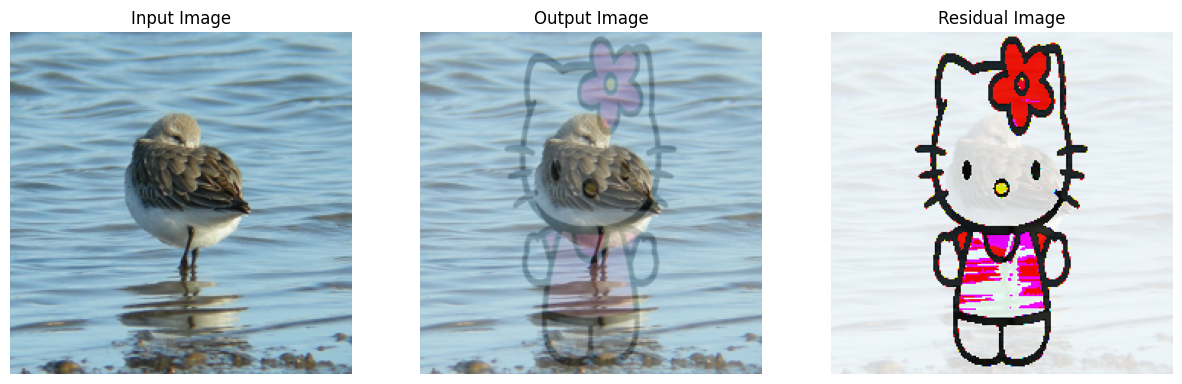

In [3]:
bd='../data/imagenet/ssim0.9681_psnr31.89_lp0.0124_wd0.203_color5.491-even/n02027492_9711.JPEG'
issba='../data/imagenet/train_issba/n02027492/n02027492_9711.JPEG'
origin='../data/imagenet/train/n02027492/n02027492_9711.JPEG'

import sys
sys.path.append('../')
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import ToTensor
from datasets.CTRL.utils.frequency import PoisonFre
from copy import deepcopy
from PIL import Image, ImageDraw

def calculate_and_display_residual(origin, alter):
    origin = Image.open(origin)
    origin = origin.resize((224, 224))

    alter = deepcopy(origin)

    hello_kitty_path = "imgs/1.jpg"
    hello_kitty = Image.open(hello_kitty_path)

    # Resize Hello Kitty to match the original image size for blending
    hello_kitty = hello_kitty.resize((224, 224))

    # Perform blending using a constant alpha
    alpha = 0.2  # Define the transparency for the backdoor pattern; adjust as needed
    alter = Image.blend(origin, hello_kitty, alpha)

    # 计算残差
    input_array = np.array(origin, dtype=np.uint8)  # 使用整型防止溢出
    output_array = np.array(alter, dtype=np.uint8)  # 使用整型防止溢出
    alter = Image.fromarray(output_array)

    residual_array = np.abs(input_array - output_array)

    # 放大残差
    # residual_array = residual_array * 5  # 假设放大5倍

    # 归一化到0-255范围
    residual_array = np.clip(residual_array, 0, 255).astype(np.uint8)

    # 创建残差图像
    residual_image = Image.fromarray(residual_array)
    if not os.path.exists('imgs/blend'):
            os.makedirs('imgs/blend')
    origin.save('imgs/blend/origin.jpg')
    alter.save('imgs/blend/alter.jpg')

    residual_image.save('imgs/blend/residual.jpg')
    # 使用matplotlib显示图像
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(origin)
    axs[0].set_title('Input Image')
    axs[0].axis('off')

    axs[1].imshow(alter)
    axs[1].set_title('Output Image')
    axs[1].axis('off')

    axs[2].imshow(residual_image)
    axs[2].set_title('Residual Image')
    axs[2].axis('off')

    plt.show()


# 使用方法
calculate_and_display_residual(origin,bd)


/home/hrzhang/anaconda3/envs/badencoder/lib/python3.8/site-packages/torch/nn/functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


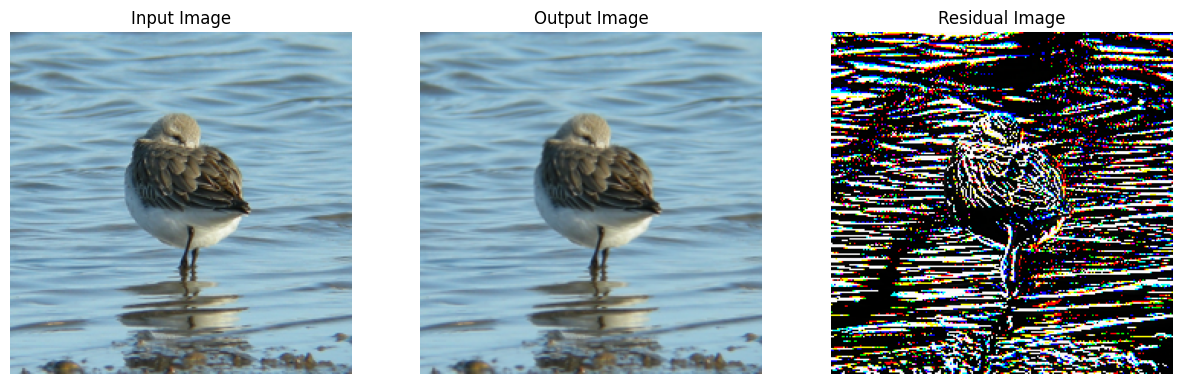

In [8]:
bd='../data/imagenet/ssim0.9681_psnr31.89_lp0.0124_wd0.203_color5.491-even/n02027492_9711.JPEG'
issba='../data/imagenet/train_issba/n02027492/n02027492_9711.JPEG'
origin='../data/imagenet/train/n02027492/n02027492_9711.JPEG'

import sys
sys.path.append('../')
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import ToTensor
from datasets.CTRL.utils.frequency import PoisonFre
from copy import deepcopy
from PIL import Image, ImageDraw
import random, torch
import torch.nn.functional as F

def random_affine_transformation(image):
    # Define the parameters for the affine transformation
    angle = random.uniform(-10, 10)  # Rotation angle
    translate = (random.uniform(-5, 5), random.uniform(-5, 5))  # Translation
    scale = random.uniform(0.9, 1.1)  # Scaling factor
    shear = random.uniform(-5, 5)  # Shear factor

    # Apply the affine transformation
    return image.transform(image.size, Image.AFFINE, (scale, shear, translate[0], shear, scale, translate[1]), Image.BICUBIC)


def calculate_and_display_residual(origin, alter):
    origin = Image.open(origin)
    origin = origin.resize((224, 224))

    alter = deepcopy(origin)

    input_height=224
    grid_rescale=1
    s=0.5
    k=4

    alter = transforms.ToTensor()(alter)

    ins = torch.rand(1, 2, k, k) * 2 - 1
    ins = ins / torch.mean(torch.abs(ins))
    noise_grid = (
        F.upsample(ins, size=input_height, mode="bicubic", align_corners=True)
        .permute(0, 2, 3, 1)
    )
    array1d = torch.linspace(-1, 1, steps=input_height)
    x, y = torch.meshgrid(array1d, array1d)
    identity_grid = torch.stack((y, x), 2)[None, ...]

    grid_temps = (identity_grid + s * noise_grid / input_height) * grid_rescale
    grid_temps = torch.clamp(grid_temps, -1, 1)

    alter = F.grid_sample(alter.unsqueeze(0), grid_temps.repeat(1, 1, 1, 1), align_corners=True)

    # 计算残差
    input_array = np.array(origin, dtype=np.uint8)  # 使用整型防止溢出
    output_array = np.array(alter.squeeze().permute(1,2,0)*255,dtype=np.uint8)  # 使用整型防止溢出
    alter = Image.fromarray(output_array)

    residual_array = np.abs(input_array - output_array)

    # 放大残差
    # residual_array = residual_array * 5  # 假设放大5倍

    # 归一化到0-255范围
    residual_array = np.clip(residual_array, 0, 255).astype(np.uint8)

    # 创建残差图像
    residual_image = Image.fromarray(residual_array)
    if not os.path.exists('imgs/wanet'):
            os.makedirs('imgs/wanet')
    origin.save('imgs/wanet/origin.jpg')
    alter.save('imgs/wanet/alter.jpg')

    residual_image.save('imgs/wanet/residual.jpg')
    # 使用matplotlib显示图像
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(origin)
    axs[0].set_title('Input Image')
    axs[0].axis('off')

    axs[1].imshow(alter)
    axs[1].set_title('Output Image')
    axs[1].axis('off')

    axs[2].imshow(residual_image)
    axs[2].set_title('Residual Image')
    axs[2].axis('off')

    plt.show()


# 使用方法
calculate_and_display_residual(origin,bd)


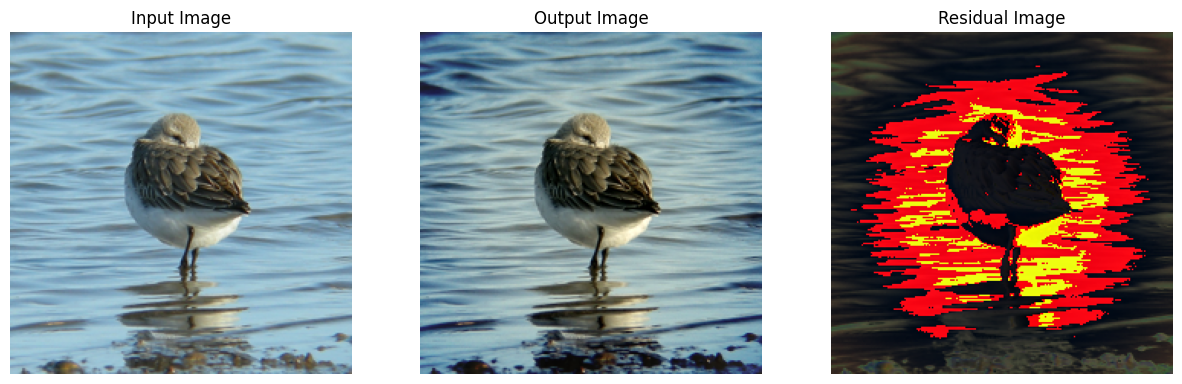

In [7]:
bd='../data/imagenet/ssim0.9681_psnr31.89_lp0.0124_wd0.203_color5.491-even/n02027492_9711.JPEG'
issba='../data/imagenet/train_issba/n02027492/n02027492_9711.JPEG'
origin='../data/imagenet/train/n02027492/n02027492_9711.JPEG'

import sys
sys.path.append('../')
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import ToTensor
from datasets.CTRL.utils.frequency import PoisonFre
from copy import deepcopy
from PIL import Image, ImageDraw
import pilgram

def calculate_and_display_residual(origin, alter):
    origin = Image.open(origin)
    origin = origin.resize((224, 224))

    alter = deepcopy(origin)

    alter = pilgram.xpro2(alter)

    # 计算残差
    input_array = np.array(origin, dtype=np.uint8)  # 使用整型防止溢出
    output_array = np.array(alter, dtype=np.uint8)  # 使用整型防止溢出
    alter = Image.fromarray(output_array)

    residual_array = np.abs(input_array - output_array)

    # 放大残差
    # residual_array = residual_array * 5  # 假设放大5倍

    # 归一化到0-255范围
    residual_array = np.clip(residual_array, 0, 255).astype(np.uint8)

    # 创建残差图像
    residual_image = Image.fromarray(residual_array)
    if not os.path.exists('imgs/xpro2'):
            os.makedirs('imgs/xpro2')
    origin.save('imgs/xpro2/origin.jpg')
    alter.save('imgs/xpro2/alter.jpg')

    residual_image.save('imgs/xpro2/residual.jpg')
    # 使用matplotlib显示图像
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(origin)
    axs[0].set_title('Input Image')
    axs[0].axis('off')

    axs[1].imshow(alter)
    axs[1].set_title('Output Image')
    axs[1].axis('off')

    axs[2].imshow(residual_image)
    axs[2].set_title('Residual Image')
    axs[2].axis('off')

    plt.show()


# 使用方法
calculate_and_display_residual(origin,bd)


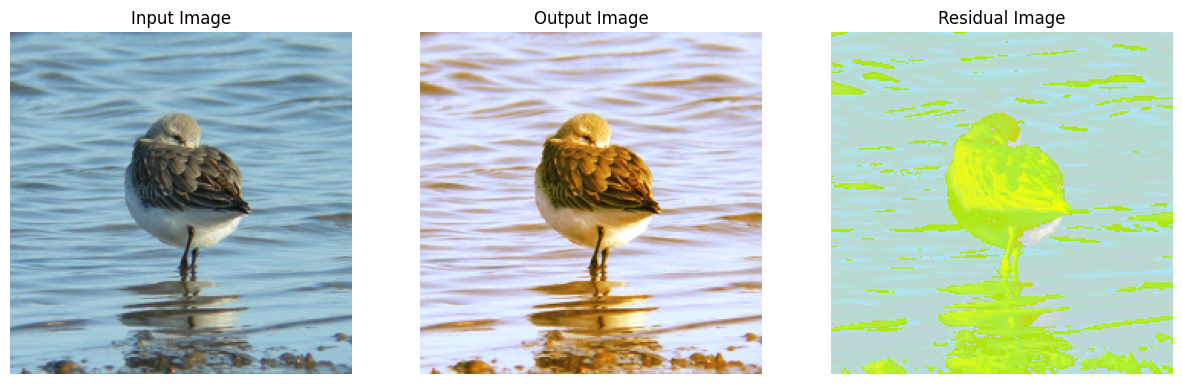

In [6]:
bd='../data/imagenet/ssim0.9681_psnr31.89_lp0.0124_wd0.203_color5.491-even/n02027492_9711.JPEG'
issba='../data/imagenet/train_issba/n02027492/n02027492_9711.JPEG'
origin='../data/imagenet/train/n02027492/n02027492_9711.JPEG'

import sys
sys.path.append('../')
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import ToTensor
from datasets.CTRL.utils.frequency import PoisonFre
from copy import deepcopy
from PIL import Image, ImageDraw
import pilgram

def calculate_and_display_residual(origin, alter):
    origin = Image.open(origin)
    origin = origin.resize((224, 224))

    alter = deepcopy(origin)

    alter = pilgram.kelvin(alter)

    # 计算残差
    input_array = np.array(origin, dtype=np.uint8)  # 使用整型防止溢出
    output_array = np.array(alter, dtype=np.uint8)  # 使用整型防止溢出
    alter = Image.fromarray(output_array)

    residual_array = np.abs(input_array - output_array)

    # 放大残差
    # residual_array = residual_array * 5  # 假设放大5倍

    # 归一化到0-255范围
    residual_array = np.clip(residual_array, 0, 255).astype(np.uint8)

    # 创建残差图像
    residual_image = Image.fromarray(residual_array)
    if not os.path.exists('imgs/kelvin'):
            os.makedirs('imgs/kelvin')
    origin.save('imgs/kelvin/origin.jpg')
    alter.save('imgs/kelvin/alter.jpg')

    residual_image.save('imgs/kelvin/residual.jpg')
    # 使用matplotlib显示图像
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(origin)
    axs[0].set_title('Input Image')
    axs[0].axis('off')

    axs[1].imshow(alter)
    axs[1].set_title('Output Image')
    axs[1].axis('off')

    axs[2].imshow(residual_image)
    axs[2].set_title('Residual Image')
    axs[2].axis('off')

    plt.show()


# 使用方法
calculate_and_display_residual(origin,bd)


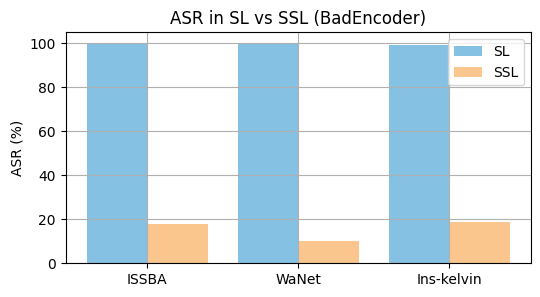

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Defining the data
data = {
    'Model': ['ISSBA', 'WaNet', 'Ins-kelvin'],
    'ASR Supervised': [100,100,99],
    'ASR Self-Supervised': [18.03,10.28,18.63]
}

# Converting to a DataFrame
df = pd.DataFrame(data)

# Setting the positions and width for the bars
pos = list(range(len(df['ASR Supervised'])))
width = 0.4

# Plotting the bars
fig, ax = plt.subplots(figsize=(6, 3))

# Creating a bar with the ASR in supervised learning data,
# in position pos,
plt.bar(pos,
        df['ASR Supervised'],
        width,
        alpha=0.5,
        color='#0c84c6',
        label=df['Model'][0])

# Creating a bar with the ASR in self-supervised learning data,
# in position pos + some width buffer
plt.bar([p + width for p in pos],
        df['ASR Self-Supervised'],
        width,
        alpha=0.5,
        color='#F78F1E',
        label=df['Model'][1])

# Setting the y axis label
ax.set_ylabel('ASR (%)')

# Setting the chart's title
ax.set_title('ASR in SL vs SSL (BadEncoder)')

# Setting the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(df['Model'])

# Adding the legend and showing the plot
plt.legend(['SL', 'SSL'], loc='upper right')
plt.grid()
plt.savefig('insight/ASR.pdf')
plt.show()
